# Visibility from Green Bank #

## Author: Charles Romero

Last updated: 2025-02-26

## Usage
A newly integrated function of _M2_ProposalTools_ is to produce visibility plots and calculate the observable time above a given elevation with MUSTANG-2 constraints. The minimum requirement is specifying the RA and Dec of the desired target.

In [1]:
import M2_ProposalTools.make_el_chart as mec
import astropy.coordinates as apc
import numpy as np
from astropy import units as u
from datetime import datetime
import os
from astropy.time import Time

This notebook will plot the visibility, by which we mean the elevation of your object as a function of time for a given day.

This fundamentally concerns where the object is in the sky (its RA and dec).
You may also wish to specify your own minimum elevation to consider. Note that elevations of 30, 40, and 50 will automatically be considered. 

Given that MUSTANG-2 is best operated from 3 hours after sunset until a half hour after sunrise, this code will take those limits into account and report the amount of time that your target is above the various elevation thresholds.

In [2]:
obj_ra = apc.Angle('13h47m00s')     # The right ascension of your object
obj_dec= apc.Angle('11d45m00s')     # The declination of your object
elMin=23.0                          # The minimum elevation at which you would consider observing the object (with the GBT)
################## Variables related to output path and filename ####################
mydir = os.getcwd()                 # If you want to specify a directory, do so here.
target='RXJ1347'                    # The target name (used in file name)
elStr = str(int(elMin))             # Used in the filename


In [3]:
skyobj = apc.SkyCoord(obj_ra, obj_dec, equinox = 'J2000')

In [4]:
current_year = datetime.now().year
date_obs  = [datetime.strptime('15-{:02d}-{:d} 23:00:00'.format(mm,current_year), '%d-%m-%Y %H:%M:%S') for mm in np.arange(12,dtype=int)+1]

While we will consider a full year for completeness, it is worth noting that the GBT undergoes summer maintenance, especially in the months of July and August (with potential spillover into June and September).

Even without telescope maintenance, those summer months are the worst times for high-frequency observing, primarily due to increased precipitable water vapor (PWV), which regulates the atmospheric opacity. Of course, reduced night time is also a matter, where we observe at night to reduce or avoid thermal deformations (and where radiative heating from the Sun is a primary cause of thermal deformations).

All of this is to say that one should primarily consider the observability of targets from September until June, while recognizing that few nights in September or June are good. Ideal visibilities are those where a target is well observed for some period between October and May.

On  2025-08-15  your source never rises above the minimum source elevation you requested.
On  2025-09-15  your source never rises above the minimum source elevation you requested.
On  2025-10-15  your source never rises above the minimum source elevation you requested.


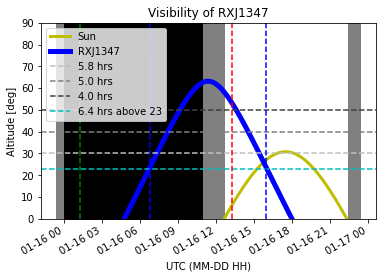

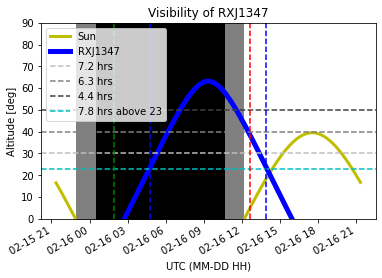

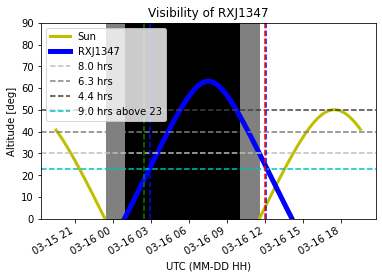

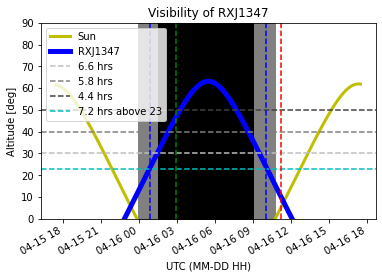

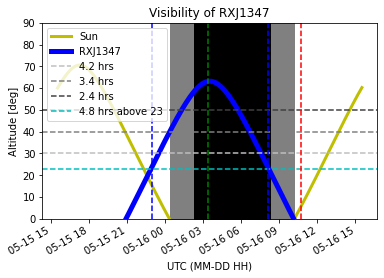

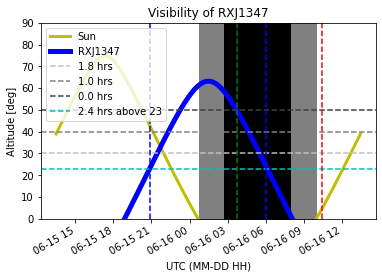

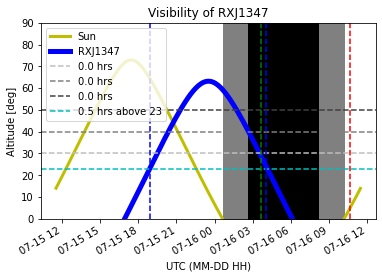

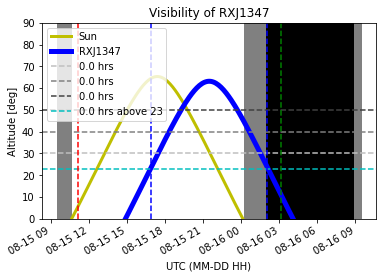

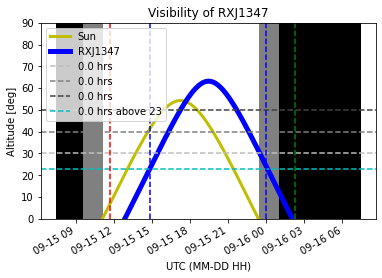

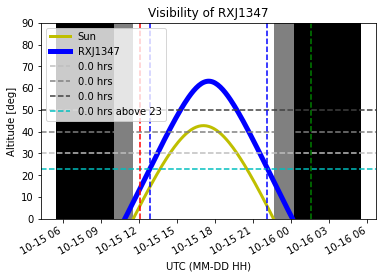

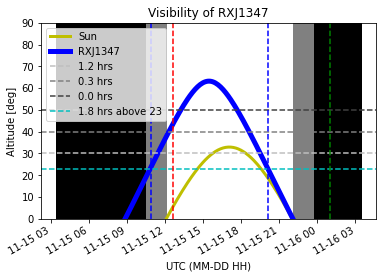

<Figure size 1600x1600 with 0 Axes>

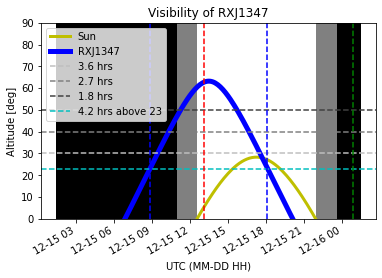

In [5]:
for i,my_obs_date in enumerate(date_obs):

    monstr = "{:02d}".format(i+1)
    Tag    = "_"+monstr+"Visibility_above"
    mec.plot_visibility(my_obs_date,skyobj,elMin=elMin,mylabel=target,
                    filename = target+Tag+elStr,mydir=mydir)

The generated plots show night and twilight as black and gray shaded regions, respectively.
The vertical dashed red line indicates a half hour after sunrise.
The vertical dashed green line indicates 3 hours after sunset.
The vertical dashed blue lines indicate where the target crosses the input minimum elevation ("elmin").
The various horizontal dahsed lines indicate their respective altitude (elevation) thresholds and have the time for which the target is above those thresholds **AND** between the green and red vertical lines. Therefore these times correspond to the amount of time for which the object can be observed by MUSTANG-2 on the given date. (These times do not include overhead, but it does indicate how long you may wish to propose observing sessions should be in the proposal system.)